## Exercise 4.3

Write your own code to design low-pass FIR-filter with custom order and cutoff frequency using Window method.

Plot impulse response and step response of the designed filter.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

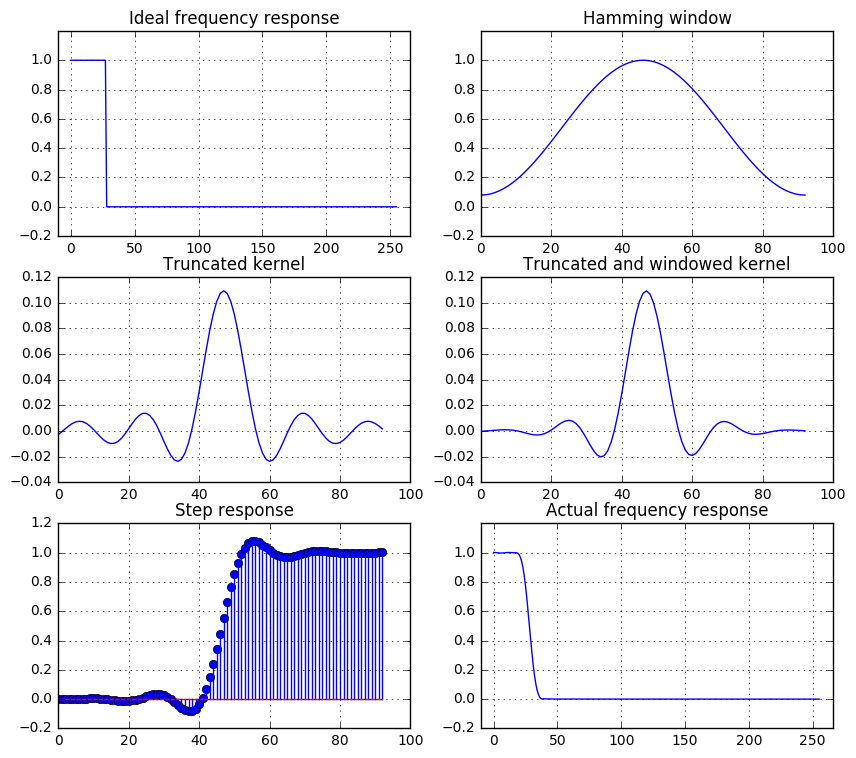

In [2]:
fs = 16000
cutoff = 900

fr_size = 512
kernel_size = 93

cutoff_point = int(fr_size * cutoff / fs)

# generate ideal frequency response for LP filter with cutoff
fr = np.zeros(fr_size)
fr[:cutoff_point] = 1.0
# mirror:
fr += fr[::-1]

# compute kernel: inverse FFT of ideal filter response
ir = np.real(np.fft.ifft(fr))

# shift and truncate the kernel
kernel = np.concatenate([ir[-kernel_size//2:], ir[:kernel_size//2]])

# apply window
kernel_windowed = kernel * np.hamming(kernel_size)

# compute real frequency response from the windowed kernel
real_fr = np.abs(np.fft.fft(kernel_windowed, n=fr_size))

# step response
step = np.cumsum(kernel_windowed)


plt.subplots(3, 2, figsize=(10, 9))

plt.subplot(321)
plt.title("Ideal frequency response")
plt.plot(fr[:fr_size // 2])
plt.ylim([-0.2, 1.2])
plt.xlim([-10, fr_size // 2 + 10])
plt.grid()

plt.subplot(322)
plt.title("Hamming window")
plt.plot(np.hamming(kernel_size))
plt.ylim([-0.2, 1.2])
plt.grid()

plt.subplot(323)
plt.title("Truncated kernel")
plt.plot(kernel)
plt.grid()

plt.subplot(324)
plt.title("Truncated and windowed kernel")
plt.plot(kernel_windowed)
plt.grid()

plt.subplot(325)
plt.title("Step response")
plt.stem(step)
plt.grid()

plt.subplot(326)
plt.title("Actual frequency response")
plt.plot(real_fr[:fr_size // 2])
plt.ylim([-0.2, 1.2])
plt.xlim([-10, fr_size // 2 + 10])
plt.grid()
